In [2]:
using Plots
using Transits


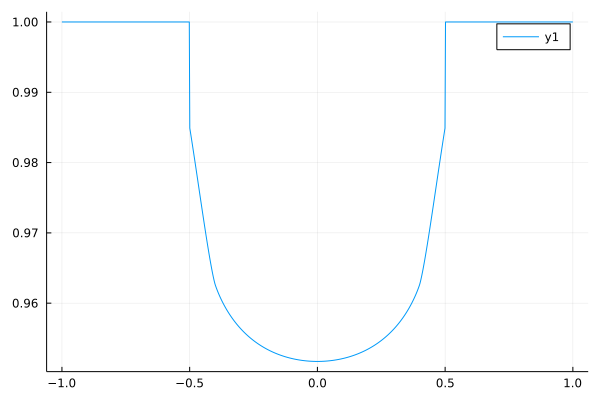

In [11]:
orbit = SimpleOrbit(period=3, duration=1)
u = [0.4, 0.25] # quad limb dark
ld = QuadLimbDark(u)
#PolynomialLimbDark(u)

t = range(-1, 1, length=1000) # days from t0
rs = range(0, 0.2, length=10) # radius ratio

rs1 = 0.2


fluxes = ld.(orbit, t, rs1);


plot(t, fluxes)


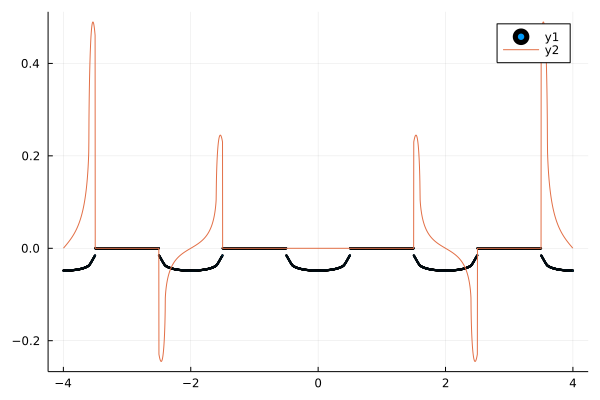

In [76]:
using Zygote

ts = range(-4, 4, length=4000) # days from t0
ror = 0.2
u_n = [0.4, 0.25]
dur=1.0
per=2.0

#orbit = 
lightcurve(X) = compute(QuadLimbDark(X[5:end]), SimpleOrbit(period=X[2], duration=X[3]), X[1], X[4])

# use Zygote for gradient
#flux = [lightcurve([t, per, dur, ror, u_n...]) for t in ts]

grads = mapreduce(hcat, ts) do t
    grad = lightcurve'([t, per, dur, ror, u_n...])
    return grad === nothing ? zeros(6) : grad
end

scatter(ts, flux.-1.0, markersize=1)
plot!(ts, grads[2, :])

In [51]:
lightcurve(X) = compute(QuadLimbDark(X[3:end]), X[1], X[2])
grad(X) = lightcurve'(X) # Zygote gradient
grad([0.1, 0.2, 0.4, 0.25])

4-element Vector{Float64}:
  0.002053498601742905
 -0.47981297098925874
 -0.018732822873217994
 -0.009716624341256495

In [85]:
# Import libraries.
using Turing, Zygote, Random

# Set the true probability of heads in a coin.
per_true = 3.0

ts = range(-4, 4, length=4000) # days from t0
ror = 0.2
u_n = [0.4, 0.25]
dur=0.2
per=3.0


#orbit = 
lightcurve(X) = compute(QuadLimbDark(X[5:end]), SimpleOrbit(period=X[2], duration=X[3]), X[1], X[4])

flux = [lightcurve([t, per, dur, ror, u_n...]) for t in ts]
# use Zygote for gradient
#flux = [lightcurve([t, per, dur, ror, u_n...]) for t in ts]

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
#data = rand(Bernoulli(p_true), last(Ns))

# Declare our Turing model.
@model function coinflip(y)
    # Our prior belief about the probability of heads in a coin.
    r ~ Normal(0.3, 0.1)

    # The number of observations.
    N = length(flux)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Normal(lightcurve([ts[n], per, dur, abs(r), u_n...]), 0.05)
    end
end

# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(flux), HMC(ϵ, τ), iterations)

# Plot a summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
histogram(chain[:p])

Sampling: 100%|█████████████████████████████████████████| Time: 0:04:08


LoadError: ArgumentError: index p not found

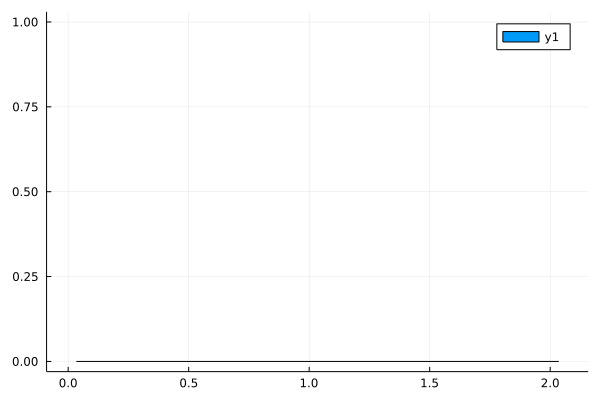

In [86]:
histogram(chain[:r])

In [87]:
chain[:r]

2-dimensional AxisArray{Float64,2,...} with axes:
    :iter, 1:1:1000
    :chain, 1:1
And data, a 1000×1 Matrix{Float64}:
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
  ⋮
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038
 -0.9659615536438038